# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv("bank.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))
data['loan_applicant_id'] = data['loan_applicant_id'].astype('object')

(41188, 10)
['loan_applicant_id', 'age', 'education', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt', 'y']


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_applicant_id            41188 non-null  object 
 1   age                          41188 non-null  int64  
 2   education                    41188 non-null  object 
 3   years_with_current_employer  41188 non-null  int64  
 4   years_at_current_address     41188 non-null  int64  
 5   household_income             41188 non-null  int64  
 6   debt_to_income_ratio         41188 non-null  float64
 7   credit_card_debt             41188 non-null  float64
 8   other_debt                   41188 non-null  float64
 9   y                            41188 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.1+ MB


In [4]:
data.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [5]:
data['education'].unique()

array(['university.degree', 'high.school', 'illiterate', 'basic',
       'professional.course'], dtype=object)

In [6]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2729411777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


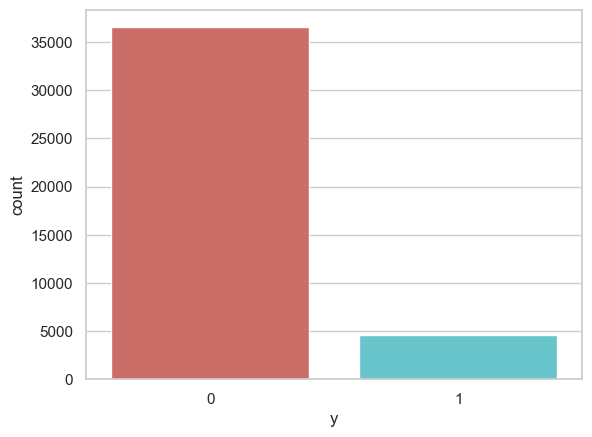

In [7]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [8]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 88.73458288821988
 percentage of default 11.265417111780131


# 3. Data Preparation

In [9]:
cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['education']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [10]:
data_final=data[to_keep]
data_final.drop(['loan_applicant_id'], axis=1, inplace=True)
#data_final.drop(['education'], axis=1, inplace=True)
data_final.columns.values

C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\3870334301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(['loan_applicant_id'], axis=1, inplace=True)


array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'y', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'], dtype=object)

In [11]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   years_with_current_employer    41188 non-null  int64  
 2   years_at_current_address       41188 non-null  int64  
 3   household_income               41188 non-null  int64  
 4   debt_to_income_ratio           41188 non-null  float64
 5   credit_card_debt               41188 non-null  float64
 6   other_debt                     41188 non-null  float64
 7   y                              41188 non-null  int64  
 8   education_basic                41188 non-null  bool   
 9   education_high.school          41188 non-null  bool   
 10  education_illiterate           41188 non-null  bool   
 11  education_professional.course  41188 non-null  bool   
 12  education_university.degree    41188 non-null 

In [12]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is  48912
 Number of no default in oversampled data 24456
 Number of default 24456
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


In [13]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=9)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\Woomy\anaconda3\envs\incidencias\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Woomy\anaconda3\envs\incidencias\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[False False  True False  True  True  True  True  True  True  True  True]
[3 2 1 4 1 1 1 1 1 1 1 1]


In [14]:
os_data_X.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [15]:
data_X1 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
2,years_at_current_address,1
6,other_debt,1
5,credit_card_debt,1
4,debt_to_income_ratio,1
7,education_basic,1
10,education_professional.course,1
9,education_illiterate,1
8,education_high.school,1
11,education_university.degree,1
1,years_with_current_employer,2


In [16]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] >= 1:
        cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['age', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']
12


In [17]:
X=os_data_X[cols]
y=os_data_y['y']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48912 entries, 0 to 48911
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            48912 non-null  int64  
 1   years_with_current_employer    48912 non-null  int64  
 2   years_at_current_address       48912 non-null  int64  
 3   household_income               48912 non-null  int64  
 4   debt_to_income_ratio           48912 non-null  float64
 5   credit_card_debt               48912 non-null  float64
 6   other_debt                     48912 non-null  float64
 7   education_basic                48912 non-null  bool   
 8   education_high.school          48912 non-null  bool   
 9   education_illiterate           48912 non-null  bool   
 10  education_professional.course  48912 non-null  bool   
 11  education_university.degree    48912 non-null  bool   
dtypes: bool(5), float64(3), int64(4)
memory usage:

In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48912 entries, 0 to 48911
Series name: y
Non-Null Count  Dtype
--------------  -----
48912 non-null  int64
dtypes: int64(1)
memory usage: 382.2 KB


# 4. Modeling

In [20]:
import numpy as np
import statsmodels.api as sm

# Convertir las variables booleanas a enteros (0 o 1)
X = X.astype(int)

# Asegúrate de que el formato sea numérico utilizando np.asarray
X_np = np.asarray(X)
y_np = np.asarray(y)

# Construir el modelo logit
logit_model = sm.Logit(y_np, X_np)
result = logit_model.fit()

# Mostrar el resumen del modelo
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.385735
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.444     
Date:               2024-09-26 09:23 AIC:              37758.1505
No. Observations:   48912            BIC:              37863.7239
Df Model:           11               Log-Likelihood:   -18867.   
Df Residuals:       48900            LL-Null:          -33903.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.0765     0.0011   -67.8100   0.0000   -0.0787   -0.0743
x2       -0.0371     0.0015   -24.0463   0.0000   -0.0401 

In [21]:
pvalue = pd.DataFrame(result.pvalues, columns=['p_value'])
pvalue


,p_value
0,0.000000e+00
1,9.135242e-128
2,0.000000e+00
3,1.981891e-102
4,2.381931e-303
5,0.000000e+00
6,3.460891e-309
7,0.000000e+00
8,0.000000e+00
9,0.000000e+00


In [22]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
12


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\Woomy\anaconda3\envs\incidencias\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 5. Evaluation

In [24]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7882  147]
 [1357 6755]]


In [26]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  14637 correct predictions
 The result is telling us that we have:  1504 incorrect predictions
 We have a total predictions of:  16141


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8029
           1       0.98      0.83      0.90      8112

    accuracy                           0.91     16141
   macro avg       0.92      0.91      0.91     16141
weighted avg       0.92      0.91      0.91     16141



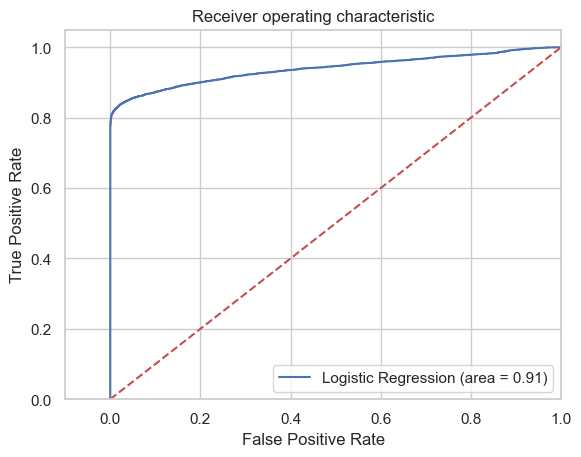

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 6. Deployment

In [29]:
data['PD'] = logreg.predict_proba(data[X_train.columns])[:,1]
data[['loan_applicant_id', 'PD']].head(10)

,loan_applicant_id,PD
0,191,0.179992
1,34318,0.045010
2,14932,0.168329
3,2776,0.797308
4,11915,0.240704
5,21925,0.491394
6,15110,0.027816
7,19944,0.053846
8,22850,0.404066
9,37927,0.007393


In [30]:
X_train.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Convertir booleanos a enteros (si es necesario)
X = X.astype(int)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear y ajustar el modelo de regresión logística
logreg = LogisticRegression(max_iter=200)  # Aumenta las iteraciones si es necesario
logreg.fit(X_train, y_train)

# Evaluación del modelo
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9070070008054024


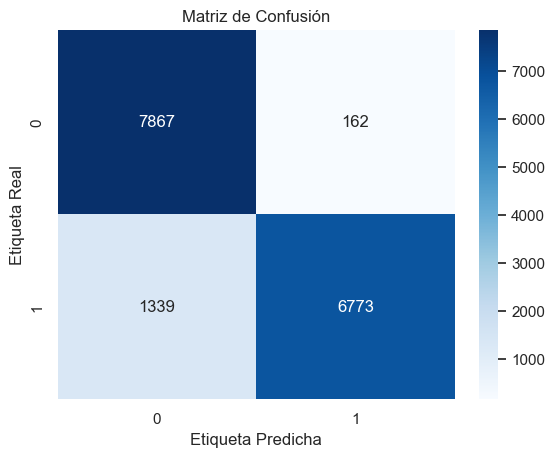

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


In [33]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      8029
           1       0.98      0.83      0.90      8112

    accuracy                           0.91     16141
   macro avg       0.92      0.91      0.91     16141
weighted avg       0.92      0.91      0.91     16141



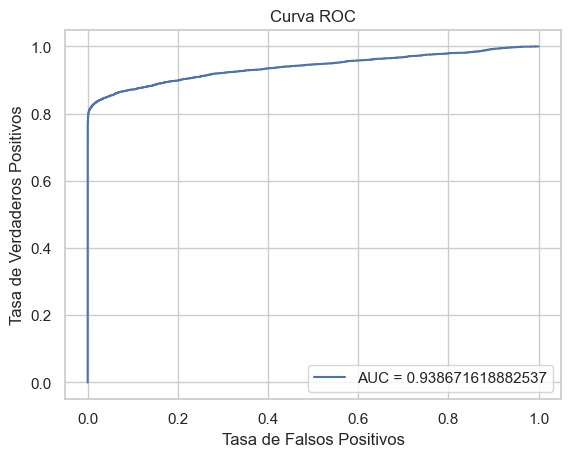

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.legend(loc=4)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


# -----------------------------------

PermutationExplainer explainer: 16142it [06:35, 40.03it/s]                           


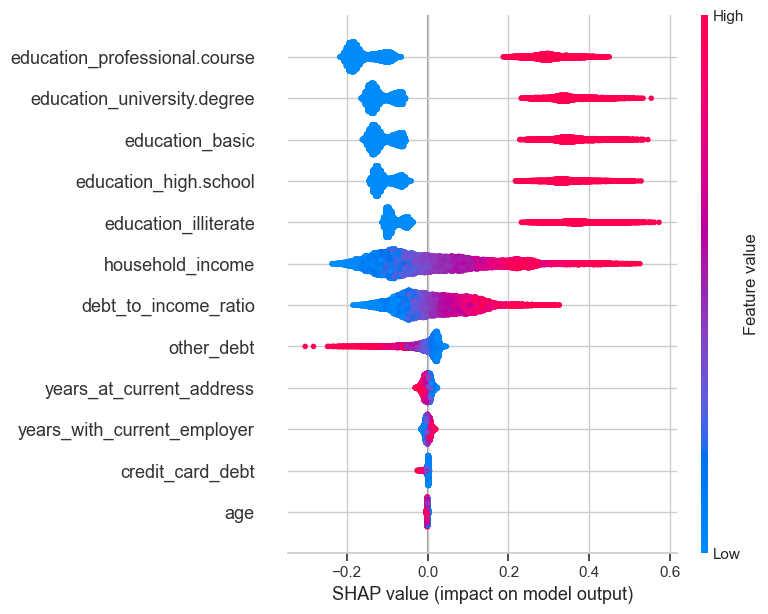

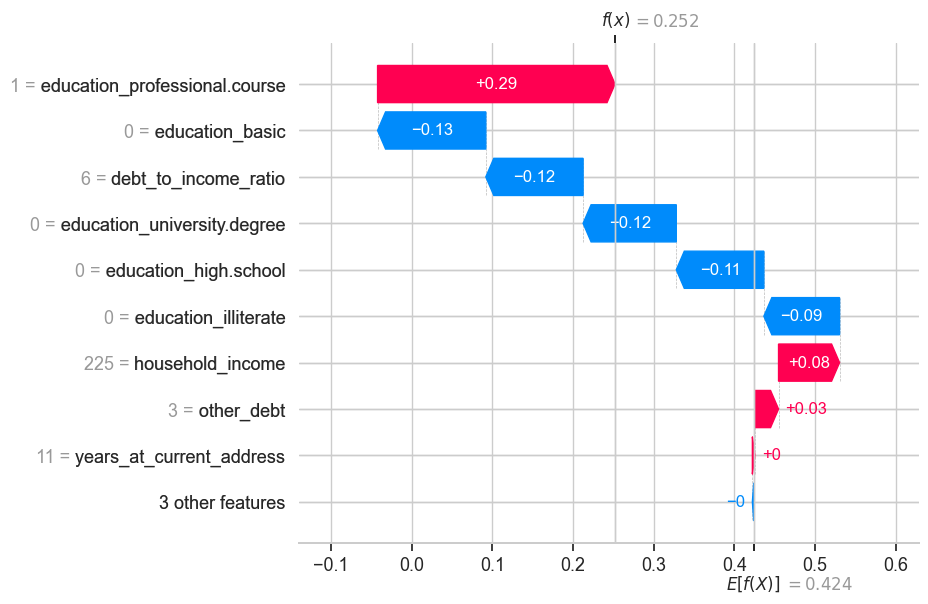

In [40]:
import shap
import numpy as np

# Crear una función que devuelva las probabilidades de la clase 1 (default) del modelo
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]  # Solo nos interesan las probabilidades de la clase 1

# Crear el explicador SHAP usando la función predict_proba_class1
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Crear un gráfico summary (beeswarm plot) basado en las probabilidades
shap.summary_plot(shap_values, X_test)

# Crear un gráfico waterfall plot para la primera observación
shap.waterfall_plot(shap_values[0])


In [43]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Crear una función que devuelva las probabilidades de la clase 1 (default) del modelo
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]  # Probabilidades de la clase 1

# Crear el explicador SHAP usando PermutationExplainer
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Calcular el valor esperado manualmente (expected value)
expected_value = np.mean(predict_proba_class1(X_train))

# Visualizar el force plot para la primera observación
shap.initjs()

# El force plot muestra cómo se combinan los valores SHAP para llegar a la predicción final
shap.force_plot(expected_value, shap_values[0].values, X_test.iloc[0,:])

# Visualizar el force plot para la décima observación
shap.force_plot(expected_value, shap_values[10].values, X_test.iloc[10,:])


PermutationExplainer explainer: 16142it [06:34, 39.87it/s]                           


PermutationExplainer explainer: 16142it [06:35, 39.86it/s]                           


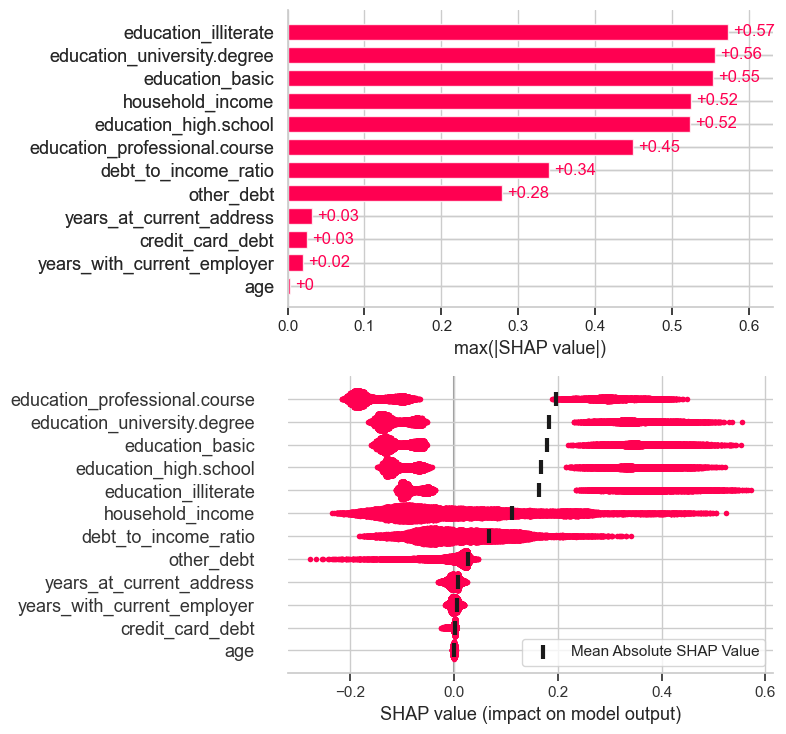

In [44]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Crear una función que devuelva las probabilidades de la clase 1 (default)
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]

# Crear el explicador SHAP usando el modelo de regresión logística
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Configurar los subplots
plt.figure(figsize=(10, 8))

# Subplot 1: Bar plot de los valores SHAP
plt.subplot(2, 1, 1)
plt.gcf()
shap.plots.bar(shap_values.abs.max(0), max_display=99, show=False)

# Subplot 2: Beeswarm plot de los valores SHAP
plt.subplot(2, 1, 2)
shap.plots.beeswarm(shap_values, color="shap_red", max_display=99, show=False, plot_size=None)

# Obtener el objeto `ax` para añadir marcadores de media absoluta SHAP value
ax = plt.gca()
masv = {}  # Diccionario para almacenar el valor absoluto medio de los valores SHAP

# Recorrer los nombres de las características en el eje Y del beeswarm plot
for feature in ax.get_yticklabels():
    name = feature.get_text()
    col_ind = X_test.columns.get_loc(name)
    mean_abs_sv = np.mean(np.abs(shap_values.values[:, col_ind]))  # Calcular la media de los valores absolutos
    masv[name] = mean_abs_sv

# Añadir los marcadores de media absoluta SHAP Value al beeswarm plot
ax.scatter(
    masv.values(),
    [i for i in range(len(X_test.columns))],
    zorder=99,
    label="Mean Absolute SHAP Value",
    c="k",
    marker="|",
    linewidths=3,
    s=100,
)

# Añadir leyenda y ajustar la disposición de los gráficos
ax.legend(frameon=True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()


PermutationExplainer explainer: 16142it [06:39, 39.34it/s]                           


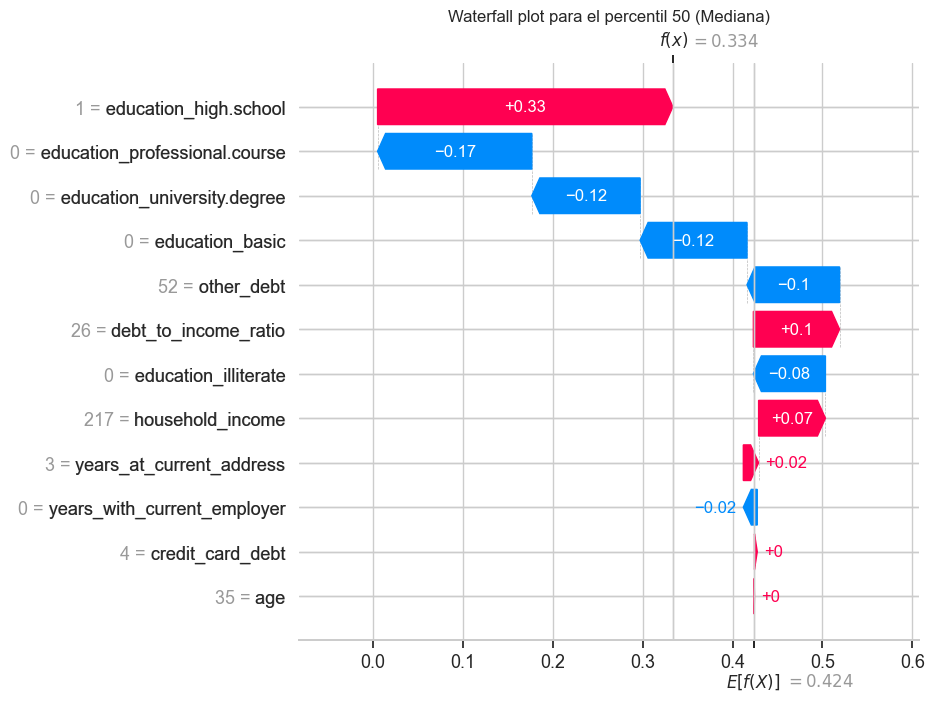

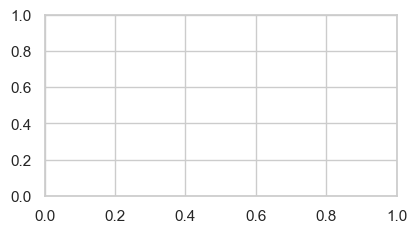

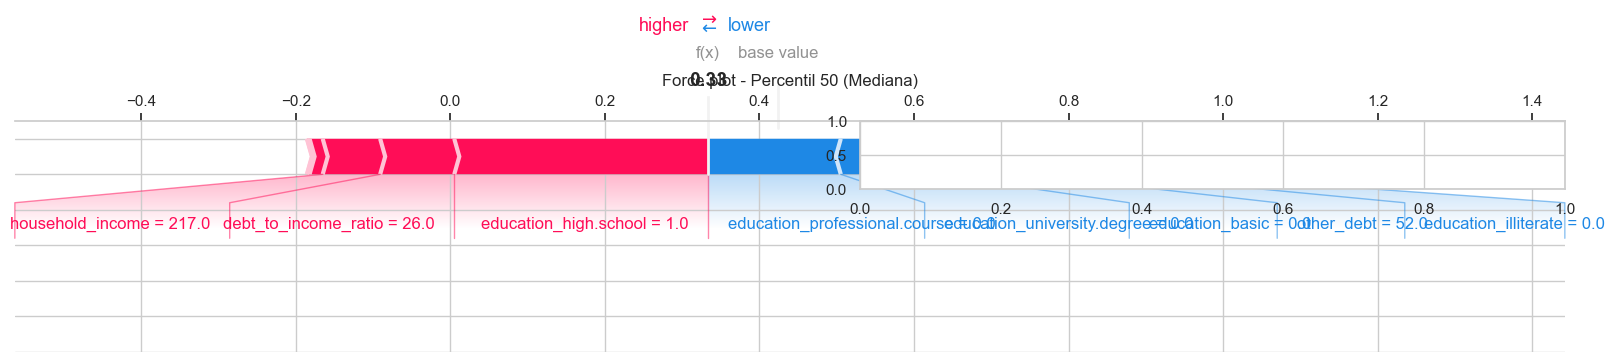

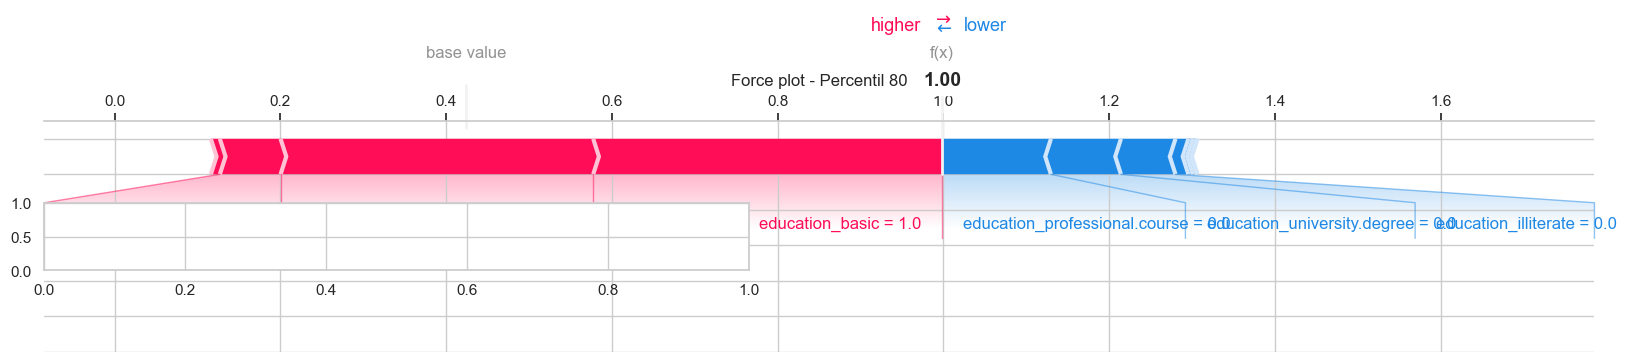

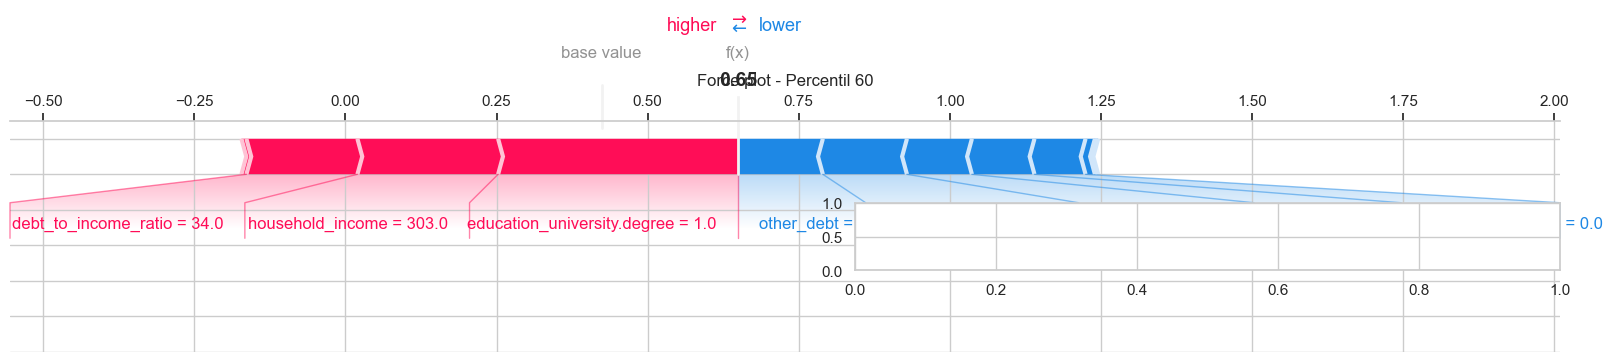

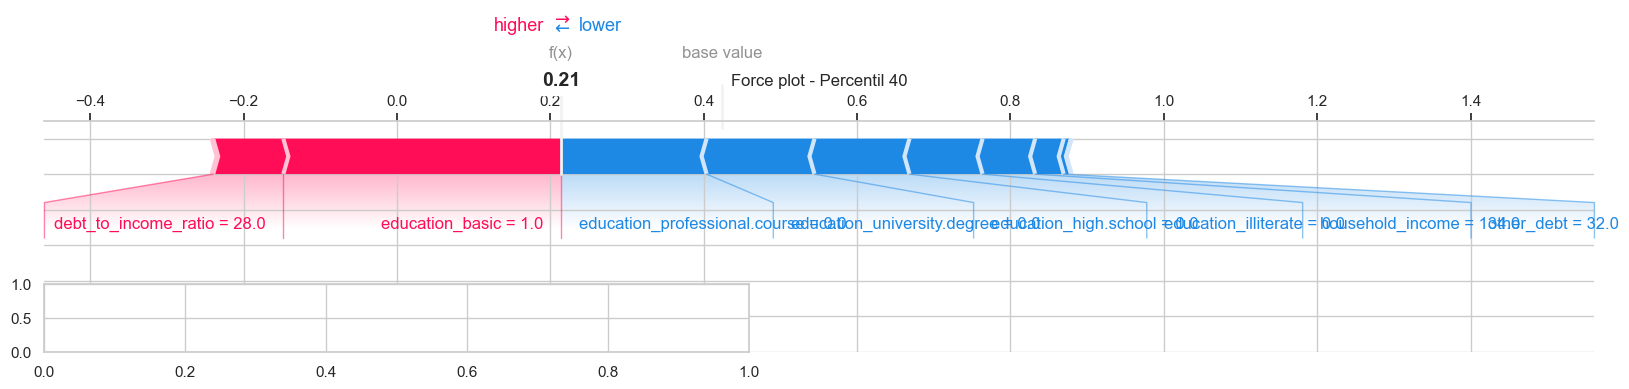

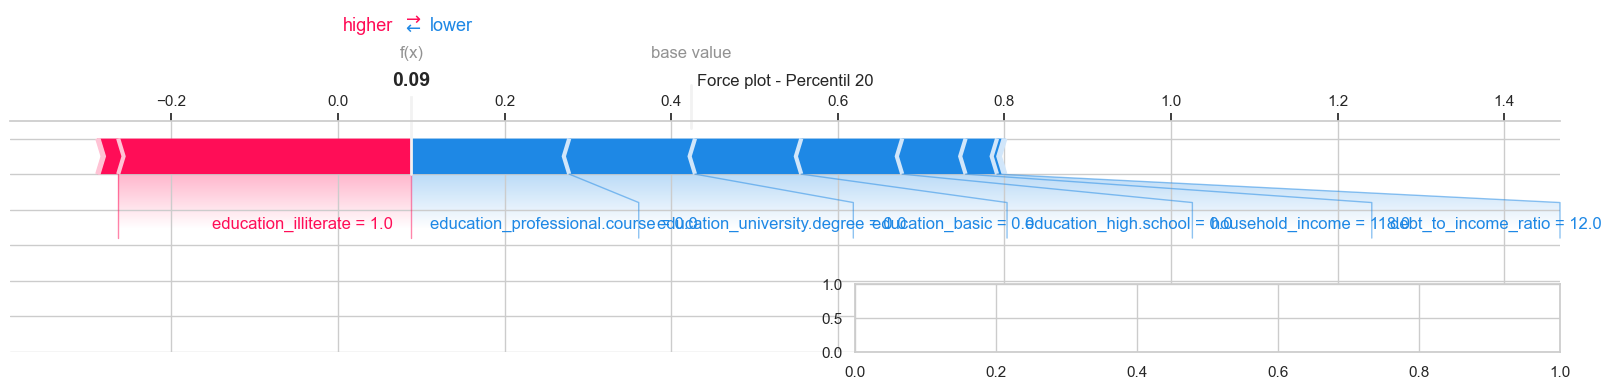

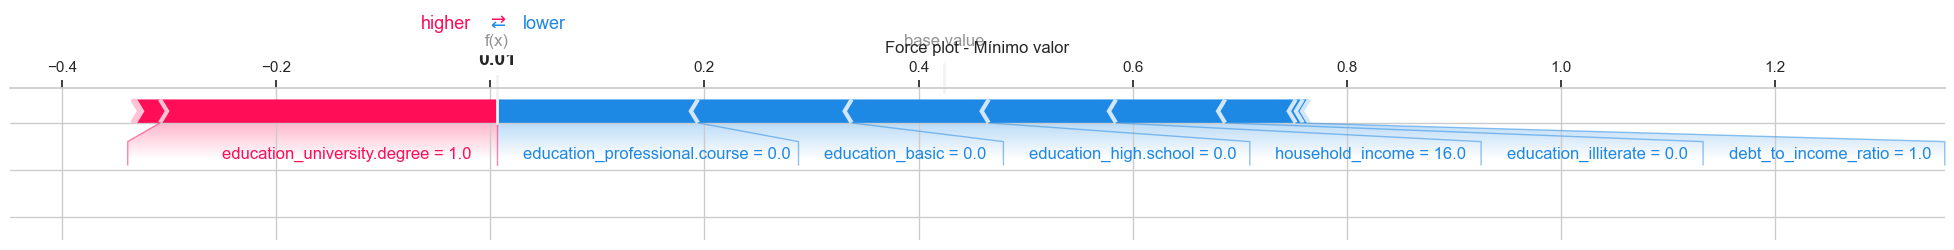

In [45]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Crear una función que devuelva las probabilidades de la clase 1 (default)
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]

# Crear el explicador SHAP usando el modelo de regresión logística
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Predecir las probabilidades en el conjunto de prueba
y_pred = predict_proba_class1(X_test)

# Definir los índices para diferentes percentiles
i_med = np.argsort(y_pred)[len(y_pred) // 2]  # Percentil 50 (mediana)
i_80 = np.argsort(y_pred)[int(len(y_pred) * 0.8)]  # Percentil 80
i_60 = np.argsort(y_pred)[int(len(y_pred) * 0.6)]  # Percentil 60
i_40 = np.argsort(y_pred)[int(len(y_pred) * 0.4)]  # Percentil 40
i_20 = np.argsort(y_pred)[int(len(y_pred) * 0.2)]  # Percentil 20
i_min = np.argmin(y_pred)  # Mínimo valor de probabilidad
i_max = np.argmax(y_pred)  # Máximo valor de probabilidad

# Waterfall plot para el valor en la mediana
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values[i_med], max_display=99, show=False)
plt.title("Waterfall plot para el percentil 50 (Mediana)")
plt.gcf()
plt.show()

# Force plots para diferentes percentiles
plt.figure(figsize=(10, 8))

# Percentil 50 (Mediana)
plt.subplot(3, 2, 1)
shap.plots.force(shap_values[i_med], show=False, matplotlib=True)
plt.title("Force plot - Percentil 50 (Mediana)")
plt.gcf()

# Percentil 80
plt.subplot(3, 2, 2)
shap.plots.force(shap_values[i_80], show=False, matplotlib=True)
plt.title("Force plot - Percentil 80")
plt.gcf()

# Percentil 60
plt.subplot(3, 2, 3)
shap.plots.force(shap_values[i_60], show=False, matplotlib=True)
plt.title("Force plot - Percentil 60")
plt.gcf()

# Percentil 40
plt.subplot(3, 2, 4)
shap.plots.force(shap_values[i_40], show=False, matplotlib=True)
plt.title("Force plot - Percentil 40")
plt.gcf()

# Percentil 20
plt.subplot(3, 2, 5)
shap.plots.force(shap_values[i_20], show=False, matplotlib=True)
plt.title("Force plot - Percentil 20")
plt.gcf()

# Mínimo valor predicho
plt.subplot(3, 2, 6)
shap.plots.force(shap_values[i_min], show=False, matplotlib=True)
plt.title("Force plot - Mínimo valor")
plt.gcf()

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()
plt.show()


PermutationExplainer explainer: 16142it [06:32, 40.07it/s]                           
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\1033298503.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\1033298503.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\1033298503.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\1033298503.py:38: UserWarning: set_ticklabels() should only be use

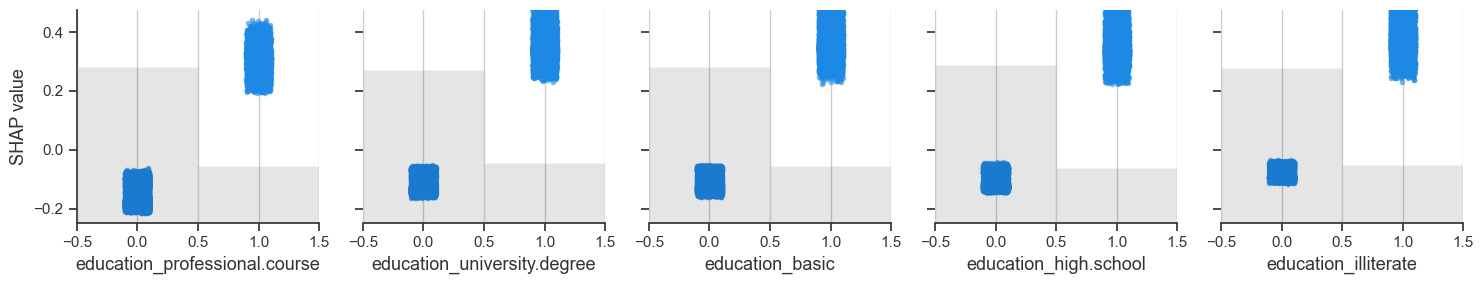

In [46]:
import shap
import matplotlib.pyplot as plt

# Crear una función que devuelva las probabilidades de la clase 1 (default)
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]

# Crear el explicador SHAP usando el modelo de regresión logística
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Calcular la media de los valores absolutos de SHAP para cada característica
masv = {}
for col in X_test.columns:
    col_ind = X_test.columns.get_loc(col)
    mean_abs_sv = np.mean(np.abs(shap_values.values[:, col_ind]))  # Media de los valores absolutos de SHAP
    masv[col] = mean_abs_sv

# Número de gráficos de dependencia a mostrar
n = 5

# Crear la figura para los gráficos
fig, ax = plt.subplots(1, n, figsize=(15, 3))

# Generar los gráficos de dependencia para las n características más importantes
for i, (k, v) in enumerate(sorted(masv.items(), key=lambda x: x[1], reverse=True)):
    if i < n:
        shap.plots.scatter(shap_values[:, X_test.columns.get_loc(k)], ax=ax[i], show=False, alpha=0.6)
        ax[i].grid(axis="y")
        
        # Ajustes visuales para todos los gráficos excepto el primero
        if i != 0:
            ax[i].set_ylabel("")
            ax[i].spines["left"].set_visible(False)
            ax[i].set_ylim(ax[0].get_ylim())
            ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
        else:
            ax[i].set_ylabel("SHAP value")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


https://medium.com/data-reply-it-datatech/explainable-ai-shap-values-1c7128ef06c2

PermutationExplainer explainer: 16142it [06:31, 40.22it/s]                           
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2453746377.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2453746377.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2453746377.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2453746377.py:38: UserWarning: set_ticklabels() should only be use

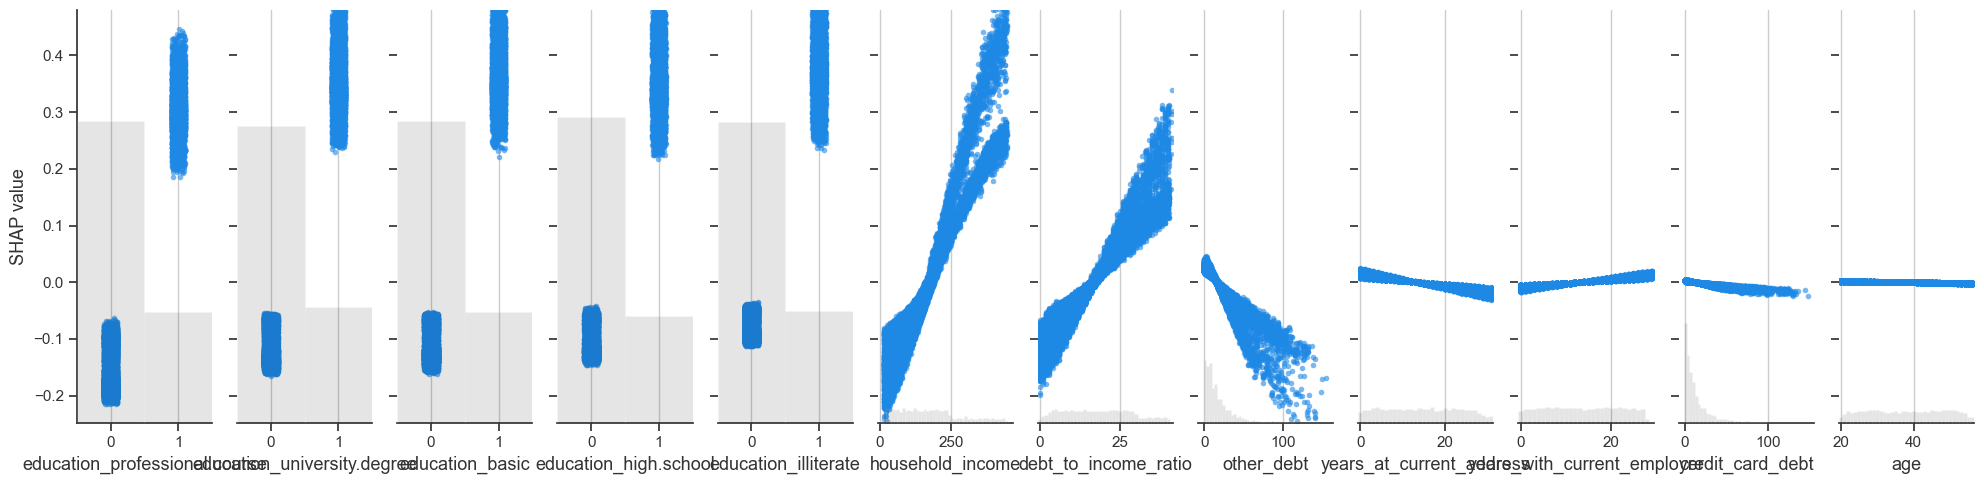

In [47]:
import shap
import matplotlib.pyplot as plt

# Crear una función que devuelva las probabilidades de la clase 1 (default)
def predict_proba_class1(X):
    return logreg.predict_proba(X)[:, 1]

# Crear el explicador SHAP usando el modelo de regresión logística
explainer = shap.Explainer(predict_proba_class1, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Calcular la media de los valores absolutos de SHAP para cada característica
masv = {}
for col in X_test.columns:
    col_ind = X_test.columns.get_loc(col)
    mean_abs_sv = np.mean(np.abs(shap_values.values[:, col_ind]))  # Media de los valores absolutos de SHAP
    masv[col] = mean_abs_sv

# Número de gráficos de dependencia a mostrar (12 características)
n = 12

# Crear la figura para los gráficos de dependencia
fig, ax = plt.subplots(1, n, figsize=(20, 5))

# Generar los gráficos de dependencia para las 12 características más importantes
for i, (k, v) in enumerate(sorted(masv.items(), key=lambda x: x[1], reverse=True)):
    if i < n:
        shap.plots.scatter(shap_values[:, X_test.columns.get_loc(k)], ax=ax[i], show=False, alpha=0.6)
        ax[i].grid(axis="y")
        
        # Ajustes visuales para todos los gráficos excepto el primero
        if i != 0:
            ax[i].set_ylabel("")
            ax[i].spines["left"].set_visible(False)
            ax[i].set_ylim(ax[0].get_ylim())
            ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
        else:
            ax[i].set_ylabel("SHAP value")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2669052530.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_yticklabels(["" for _ in range(len(ax[row, 0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2669052530.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_yticklabels(["" for _ in range(len(ax[row, 0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2669052530.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_yticklabels(["" for _ in range(len(ax[row, 0].get_yticks()))])
C:\Users\Woomy\AppData\Local\Temp\ipykernel_10588\2669052530.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

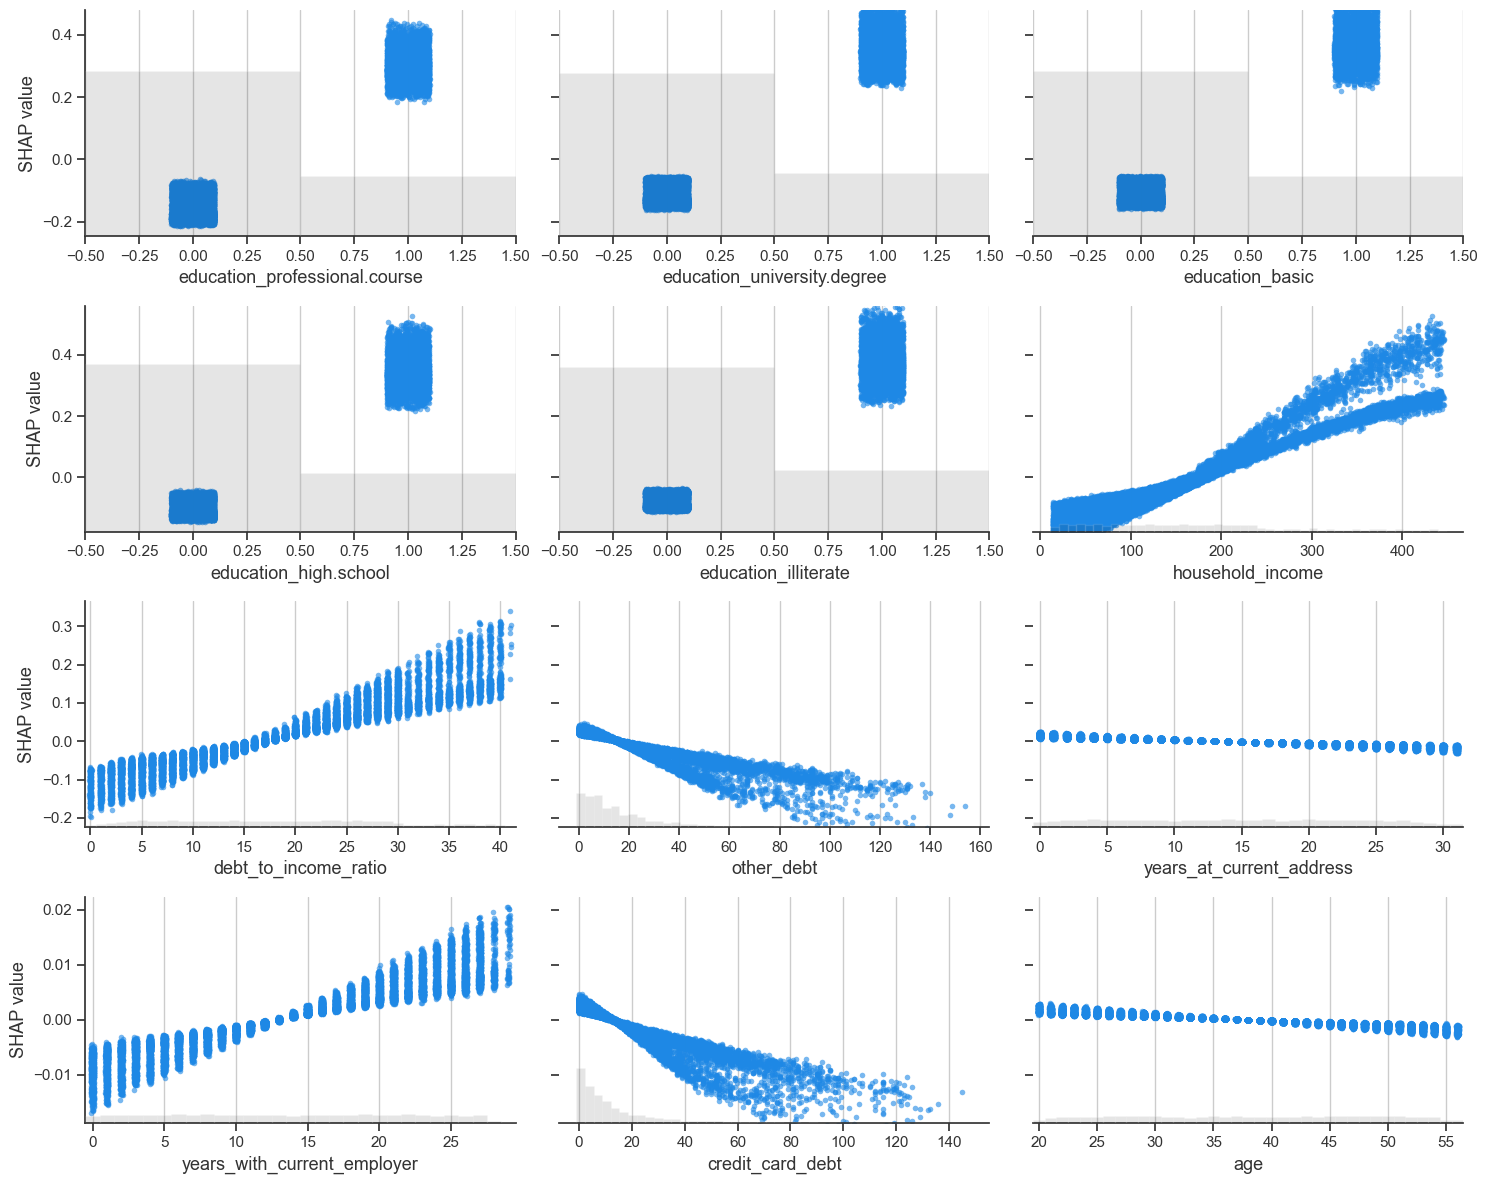

In [48]:
# Número de gráficos de dependencia a mostrar (12 características)
n = 12

# Crear la figura para los gráficos de dependencia con 4 filas y 3 columnas
fig, ax = plt.subplots(4, 3, figsize=(15, 12))

# Generar los gráficos de dependencia para las 12 características más importantes
for i, (k, v) in enumerate(sorted(masv.items(), key=lambda x: x[1], reverse=True)):
    if i < n:
        row, col = divmod(i, 3)  # Dividir los gráficos en filas y columnas
        shap.plots.scatter(shap_values[:, X_test.columns.get_loc(k)], ax=ax[row, col], show=False, alpha=0.6)
        ax[row, col].grid(axis="y")
        
        # Ajustes visuales para todos los gráficos excepto el primero de cada fila
        if col != 0:
            ax[row, col].set_ylabel("")
            ax[row, col].spines["left"].set_visible(False)
            ax[row, col].set_ylim(ax[row, 0].get_ylim())
            ax[row, col].set_yticklabels(["" for _ in range(len(ax[row, 0].get_yticks()))])
        else:
            ax[row, col].set_ylabel("SHAP value")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()